<a href="https://colab.research.google.com/github/JagratiTalreja01/Super-Resolution-SRCNN-/blob/main/Bilinear_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from keras.layers import Input, Conv2D, Activation, UpSampling2D
from keras.models import Model
from keras import optimizers
import keras
import tensorflow 
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image

In [14]:
img_shape = (32,32,1)
input_img = Input(shape=(img_shape))
C1 = Conv2D(64,(9,9),padding='SAME',name='CONV1')(input_img)
A1 = Activation('relu', name='act1')(C1)
C2 = Conv2D(32,(1,1),padding='SAME',name='CONV2')(A1)
A2 = Activation('relu', name='act2')(C2)
C3 = Conv2D(1,(5,5),padding='SAME',name='CONV3')(A2)
A3 = Activation('relu', name='act3')(C3)
U = UpSampling2D((2, 2), interpolation='bilinear')(A3)
model = Model(input_img, U)
opt = tensorflow.keras.optimizers.Adam(lr=0.0003)
model.compile(optimizer=opt,loss='mean_squared_error')
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 CONV1 (Conv2D)              (None, 32, 32, 64)        5248      
                                                                 
 act1 (Activation)           (None, 32, 32, 64)        0         
                                                                 
 CONV2 (Conv2D)              (None, 32, 32, 32)        2080      
                                                                 
 act2 (Activation)           (None, 32, 32, 32)        0         
                                                                 
 CONV3 (Conv2D)              (None, 32, 32, 1)         801       
                                                                 
 act3 (Activation)           (None, 32, 32, 1)         0   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


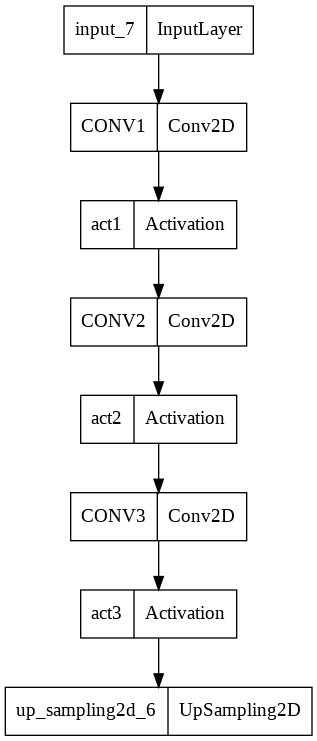

In [16]:
tensorflow.keras.utils.plot_model(model, 'my_first_model.png')


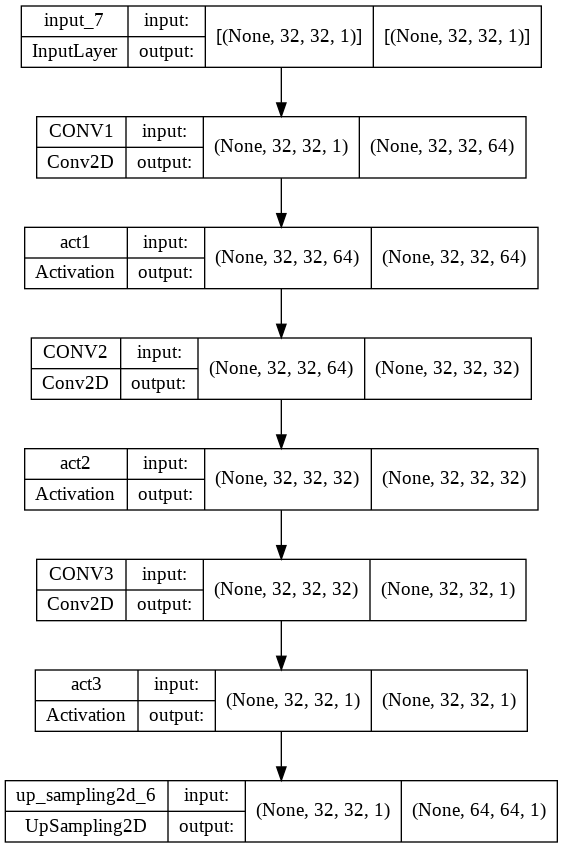

In [18]:
tensorflow.keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)
